# We construct portfolios to:



1.   Diversify risk: By combining multiple assets with different risk and return characteristics, we can reduce the overall risk of our portfolio. This is because the returns of different assets are not perfectly correlated, so when one asset performs poorly, another asset may perform well, offsetting the losses.

2.  Enhance returns: By carefully selecting assets with high expected returns, we can construct a portfolio that has a higher expected return than any of the individual assets. This is because the expected return of a portfolio is a weighted average of the expected returns of the individual assets.

3. Meet specific investment objectives: Different investors have different investment objectives, such as maximizing returns, minimizing risk, or generating income. By constructing a portfolio that is tailored to our specific investment objectives, we can increase the likelihood of achieving our goals.

4. Manage cash flow: By constructing a portfolio with a mix of assets that have different cash flow characteristics, we can ensure that we have sufficient cash flow to meet our needs. For example, we may include some assets that generate regular income, such as bonds, and some assets that have the potential for capital appreciation, such as stocks.

5. Reduce transaction costs: By constructing a portfolio with a mix of assets that have different transaction costs, we can reduce the overall transaction costs of our investment. For example, we may include some assets that have low transaction costs, such as ETFs, and some assets that have higher transaction costs, such as individual stocks.


In [1]:
#IMPORTING NECESSARY DATA ANALYSIS AND VISUALIZATION LIBRARIES
# %pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
import plotly.express as px
import plotly.graph_objs as go

%matplotlib inline

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.options.display.precision = 4
plt.style.use('seaborn-ticks')

OSError: 'seaborn-ticks' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

#INVESTING IN A SINGLE STOCK

>Investing 100% allocation in one or two assets is not advisable because it exposes the investor to a high level of risk. Here are the reasons why:

1. Lack of diversification: Diversification is a risk management strategy that involves spreading investments across different assets. By investing 100% in one or two assets, the investor is not diversified and is therefore exposed to the full risk of those assets.

2. Lack of diversification: Diversification is a risk management strategy that involves spreading investments across different assets. By investing 100% in one or two assets, the investor is not diversified and is therefore exposed to the full risk of those assets.

3. Potential for catastrophic loss: If one of the assets in which the investor has invested 100% loses value, the investor could lose a significant portion of their investment. This is especially true if the asset is illiquid and the investor is unable to sell it quickly.

For these reasons, it is generally advisable to diversify investments across a range of assets. This will help to reduce the risk of the investment portfolio and provide the investor with a more stable return.
























#IF NOT ONE , THEN HOW MANY STOCKS TO KEEP IN  A PORTFOLIO IDEALLY?

The ideal number of stocks in a portfolio depends on the investor's risk tolerance, investment goals, and diversification strategy.



1. Investors with a higher risk tolerance may hold fewer stocks, while those with long-term goals may hold more.
2. A well-diversified portfolio typically contains between 20 and 30 stocks.
3. The best number of stocks for a particular investor depends on their individual circumstances and goals.
4. There is no right or wrong answer to the question of how many stocks should be in a portfolio.

Ultimately, the goal is to create a portfolio that meets the investor's unique needs and objectives.


>HOWEVER WE WILL CHECK HOW MANY STOCKS ARE AN IDEAL APPROACH BY VISUALIZING AN ELBOW CURVE OF STOCK PORTFOLIOS SHARPE RATIOS i.e. SHARPE RATIO OF 1 STOCK PORTFOLIO , 2 STOCKS PORTFOLIO , 3 STOCKS AND SO ON AN SO FORTH(ALL EQUAL WEIGHTED FOR SIMPLICITY)

######BEFORE PROCEEDING , WE WILL CHECK HOW MANY OF THE STOCKS ACTUALLY HAVE OHLC INFO AVAILABLE FROM 2015(THAT'S WHEN WE WILL BUILD OUR MODEL FROM)

In [21]:
def shares_to_watch(stock_symbols):
    stocks_data = pd.DataFrame()

   
    for stock in stock_symbols:
        # Download stock data
        stock_data = yf.download(stock, start='2021-01-01', end='2024-11-30')[['Adj Close']]

        # Add share data to the DataFrame
        stocks_data[stock] = stock_data['Adj Close']

    # Drop columns with NaN values
    cleaned_data = stocks_data.dropna(axis=1)

    return cleaned_data.columns



# Read the CSV file
# symbls = pd.read_csv('companies-list-modified1.csv')

# # Remove 'JSE:' from the Code column and add '.JO' suffix
# symbls['Code'] = symbls['Code'].str.replace('JSE:', '').str.strip() + '.JO'


# # Save the modified dataframe back to CSV
# symbls.to_csv('companies-list-modified1.csv', index=False, header=False)


# symbls =['ABG.JO','INL.JO','NED.JO','SOL.JO','ADH.JO','AVI.JO','TBS.JO','BAW.JO',
#          'MNP.JO','NTC.JO','SAP.JO','ARI.JO','GLN.JO','KIO.JO','QLT.JO','RNI.JO',
#          'REM.JO','DSY.JO','MTM.JO','OMU.JO','OUT.JO','EXX.JO','CLS.JO','SPP.JO','APN.JO',
#         'AMS.JO','DRD.JO','IMP.JO','NPH.JO','SSW.JO','FFB.JO','GRT.JO','RDF.JO','RES.JO',
#         'MTH.JO','MRP.JO','TFG.JO','TRU.JO','WHL.JO','MCG.JO','VOD.JO',"PRX.JO", "NPN.JO", "FSR.JO", "BVT.JO",
#         "CPI.JO", "SBK.JO","GFI.JO","SHP.JO","BTI.JO","IBIT","MST.JO","BHG.JO","ANH.JO","CFR.JO","AGL.JO","ANG.JO",
#         "S32.JO","SLM.JO","MTN.JO","BID.JO","HAR.JO","NHM,JO","NRP.JO","PPH.JO","INP.JO","RMI.JO","SNT.JO","HMN.JO","DCP.JO","SRE.JO",
#         ]

# symbls = ["PRX.JO","ANH.JO","BTI.JO","CFR.JO","GLN.JO","AGL.JO",
# "NPN.JO","FSR.JO","SBK.JO","CPI.JO","GFI.JO","ANG.JO","VOD.JO","S32.JO","SLM.JO",
# "SHP.JO","AMS.JO","ABG.JO","MTN.JO","BID.JO","NED.JO","DSY.JO","MNP.JO","KIO.JO",
# "HAR.JO","NHM.JO","OUT.JO","NRP.JO","PPH.JO","RNI.JO","BVT.JO","CLS.JO","IMP.JO",
# "INP.JO","REM.JO","MRP.JO","APN.JO","WHL.JO","OMU.JO","EXX.JO","SOL.JO","TFG.JO",
# "QLT.JO","RMI.JO","MCG.JO","TBS.JO","GRT.JO","SNT.JO","MTM.JO",
# "TRU.JO","INL.JO","AVI.JO","ARI.JO","HMN.JO","DCP.JO","RDF.JO","SAP.JO","SRE.JO",
# "SPP.JO","BYI.JO","LHC.JO","KST.JO","FFB.JO","CCO.JO","KRO.JO","N91.JO","PIK.JO",
# "VKE.JO","MTH.JO","RES.JO","APH.JO","ITE.JO","NTC.JO","WBC.JO","ADH.JO","PAN.JO",
# "TGA.JO","TKG.JO","GTC.JO","HYP.JO","BAW.JO","PMR.JO","LTE.JO","DRD.JO","MSP.JO",
# "HCI.JO","WBO.JO","CML.JO","RLO.JO","EQU.JO","AIL.JO","OMN.JO","SUI.JO","AIP.JO",
# "TSG.JO","AFT.JO","NY1.JO","JSE.JO","DTC.JO","ATT.JO","AFH.JO","AFE.JO","SPG.JO",
# "RBX.JO","GND.JO","OCE.JO","AEL.JO","KAP.JO","ARL.JO","RCL.JO","CAA.JO","CVW.JO",
# "IPF.JO","BAT.JO","COH.JO","SSS.JO","SAC.JO","PPC.JO","FBR.JO","CLI.JO",
# "HDC.JO","EMI.JO","SDO.JO","DKR.JO","HET.JO","RFG.JO","THA.JO","BLU.JO","DIB.JO",
# "MED.JO","CSB.JO","CAT.JO","LEW.JO","MPT.JO","NT1.JO","BEL.JO"]

symbols = ["REN.JO", "MTA.JO", "ABG.JO","FSR.JO", "INL.JO","NED.JO","OMN.JO",
           "SOL.JO","AEG.JO","MUR.JO","PPC.JO","ARL.JO","MNP.JO","NPK.JO","LHC.JO",
           "NTC.JO","SAP.JO","ARI.JO","KIO.JO","MRF.JO","SPG.JO","BAT.JO","CML.JO","DSY.JO","OMU.JO",
           "EXX.JO","PIK.JO","SPP.JO","ASC.JO","APN.JO","AMS.JO","SSW.JO","ANG.JO","GFI.JO","IMP.JO",
           "BWN.JO","GRT.JO","RDF.JO","MRP.JO","TFG.JO","TRU.JO","PPH.JO","NPN.JO","PRX.JO","EOH.JO",
           "MTN.JO","TKG.JO","BTI.JO","CLH.JO","SUR.JO"]



syms = shares_to_watch(symbols)
syms

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Index(['REN.JO', 'MTA.JO', 'ABG.JO', 'FSR.JO', 'INL.JO', 'NED.JO', 'OMN.JO',
       'SOL.JO', 'MUR.JO', 'PPC.JO', 'ARL.JO', 'MNP.JO', 'NPK.JO', 'LHC.JO',
       'NTC.JO', 'SAP.JO', 'ARI.JO', 'KIO.JO', 'MRF.JO', 'SPG.JO', 'BAT.JO',
       'CML.JO', 'DSY.JO', 'OMU.JO', 'EXX.JO', 'PIK.JO', 'SPP.JO', 'APN.JO',
       'AMS.JO', 'SSW.JO', 'ANG.JO', 'GFI.JO', 'IMP.JO', 'BWN.JO', 'GRT.JO',
       'RDF.JO', 'MRP.JO', 'TFG.JO', 'TRU.JO', 'PPH.JO', 'NPN.JO', 'PRX.JO',
       'EOH.JO', 'MTN.JO', 'TKG.JO', 'BTI.JO', 'CLH.JO', 'SUR.JO'],
      dtype='object')

In [22]:
relevant_shares = syms.values.tolist()
relevant_shares, len(relevant_shares)

(['REN.JO',
  'MTA.JO',
  'ABG.JO',
  'FSR.JO',
  'INL.JO',
  'NED.JO',
  'OMN.JO',
  'SOL.JO',
  'MUR.JO',
  'PPC.JO',
  'ARL.JO',
  'MNP.JO',
  'NPK.JO',
  'LHC.JO',
  'NTC.JO',
  'SAP.JO',
  'ARI.JO',
  'KIO.JO',
  'MRF.JO',
  'SPG.JO',
  'BAT.JO',
  'CML.JO',
  'DSY.JO',
  'OMU.JO',
  'EXX.JO',
  'PIK.JO',
  'SPP.JO',
  'APN.JO',
  'AMS.JO',
  'SSW.JO',
  'ANG.JO',
  'GFI.JO',
  'IMP.JO',
  'BWN.JO',
  'GRT.JO',
  'RDF.JO',
  'MRP.JO',
  'TFG.JO',
  'TRU.JO',
  'PPH.JO',
  'NPN.JO',
  'PRX.JO',
  'EOH.JO',
  'MTN.JO',
  'TKG.JO',
  'BTI.JO',
  'CLH.JO',
  'SUR.JO'],
 48)

# DEFINING A FUNCTION WHICH CHECKS AND PLOTS THE ELBOW CURVE OF DIFFERENT PORTFOLIOS VOLATILITIES (AS IN ORDER TO FIND AN OPTIMAL PORTFOLIO WE NEED TO TAKE CARE OF VOLATILITY

[*********************100%***********************]  48 of 48 completed


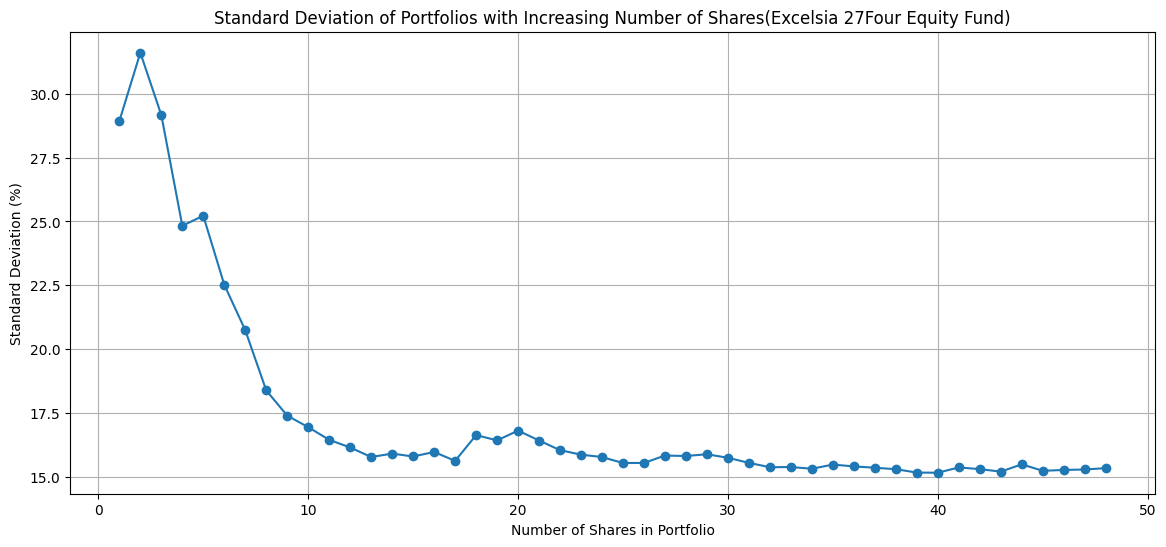

1    2892.7000%
2    3160.3000%
3    2916.4000%
4    2483.4000%
5    2522.3000%
6    2252.4000%
7    2074.5000%
8    1838.9000%
9    1740.3000%
10   1695.1000%
11   1645.6000%
12   1615.6000%
13   1578.4000%
14   1591.7000%
15   1580.4000%
16   1598.1000%
17   1563.2000%
18   1664.1000%
19   1643.4000%
20   1681.7000%
21   1642.8000%
22   1605.2000%
23   1587.6000%
24   1578.2000%
25   1554.8000%
26   1555.3000%
27   1584.1000%
28   1582.4000%
29   1589.1000%
30   1575.3000%
31   1555.5000%
32   1538.4000%
33   1539.2000%
34   1532.5000%
35   1548.7000%
36   1541.7000%
37   1536.4000%
38   1530.7000%
39   1517.5000%
40   1516.9000%
41   1537.6000%
42   1531.0000%
43   1521.2000%
44   1549.7000%
45   1524.4000%
46   1527.7000%
47   1529.6000%
48   1534.9000%
dtype: float64

In [24]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_stdev_different_portfolios(share_symbols):
    """
    Calculate standard deviation for portfolios with increasing numbers of stocks and visualize the results.

    Args:
    stock_symbols (list): A list of stock symbols without '.NS'.

    Returns:
    Series: Series containing the standard deviation for portfolios with increasing numbers of stocks.
    """
    # Add '.JO' to indicate the exchange (JSE listed) to each share symbol
    share_symbols = [symbol for symbol in share_symbols]

    # Download daily share data
    share_data = yf.download(share_symbols, start='2021-01-01', end='2024-11-30')['Adj Close']

    # Calculate daily returns
    daily_returns = share_data.pct_change().dropna()

    # Dictionary to hold expected standard deviation of portfolios
    sd = {}

    # Define number of shares in each portfolio
    number_of_stocks = np.arange(1, len(daily_returns.columns)+1)

    # Iterate through each portfolio
    for num_stocks in number_of_stocks:
        # Create equal weights for each constituent in the stock
        weights = np.full(num_stocks, 1/num_stocks)

        # Extract data from whole dataset
        stock_data_subset = daily_returns.iloc[:, :num_stocks]

        # Create covariance matrix
        cov_mat = stock_data_subset.cov()

        # Calculate annual covariance matrix
        cov_mat = cov_mat * 252

        # Calculate expected portfolio volatility
        expected_portfolio_variance = weights.T.dot(cov_mat).dot(weights)
        expected_portfolio_std_dev = np.sqrt(expected_portfolio_variance)

        # Store in dictionary
        sd[num_stocks] = round(expected_portfolio_std_dev * 100, 3)

    std_dev_of_different_portfolios = pd.Series(sd)

    # Plot standard deviations
    plt.figure(figsize=(14, 6))
    plt.plot(std_dev_of_different_portfolios.index, std_dev_of_different_portfolios.values, marker='o', linestyle='-')
    plt.title('Standard Deviation of Portfolios with Increasing Number of Shares(Excelsia 27Four Equity Fund)')
    plt.xlabel('Number of Shares in Portfolio')
    plt.ylabel('Standard Deviation (%)')
    plt.grid(True)
    plt.show()

    return std_dev_of_different_portfolios[:57]

#checking the elbow curve
elbow_curve = calculate_stdev_different_portfolios(relevant_shares)
elbow_curve

AS WE CAN CLEARLY SEE THAT AFTER A CERTAIN AMOUNT OF STOCKS , VOLATILITY CAN'T FURTHER BE REDUCED , SO WE WILL GO WITH ONLY INITIAL 20 PERFORMERS AND WILL SELECT ONLY ONE STOCK FROM ONE SECTOR AS THERE IS LIKELY TO BE A CORRELATION BETWEEN SAME SECTORAL STOCKS

In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start_date = '2021-01-01'
end_date = '2024-11-30'

# Tickers of assets

# asset_classes = symbols

assets = symbols

# Downloading data
data = yf.download(assets, start=start_date, end=end_date)["Adj Close"]

[*********************100%***********************]  50 of 50 completed


# Calculte returns

In [26]:
# Calculating returns

returns = data[assets].pct_change().dropna()

display(returns.head())

Ticker,REN.JO,MTA.JO,ABG.JO,FSR.JO,INL.JO,NED.JO,OMN.JO,SOL.JO,AEG.JO,MUR.JO,...,TRU.JO,PPH.JO,NPN.JO,PRX.JO,EOH.JO,MTN.JO,TKG.JO,BTI.JO,CLH.JO,SUR.JO
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-27 00:00:00+00:00,0.0000%,-2.5551%,-1.3356%,-0.8925%,-2.7182%,-1.0975%,0.5205%,-1.2167%,0.8475%,4.5714%,...,-1.5279%,0.6536%,0.2725%,0.0854%,4.9645%,-1.7426%,-2.7305%,-0.8768%,0.0000%,0.0000%
2024-05-28 00:00:00+00:00,0.0000%,0.3617%,-0.0915%,0.2362%,0.5065%,0.2522%,-1.6604%,-3.4411%,-0.5042%,2.7322%,...,1.3654%,-0.6494%,-1.6934%,-0.9919%,3.3784%,0.4966%,-1.8308%,0.1202%,0.4831%,-0.0333%
2024-05-30 00:00:00+00:00,-1.8357%,-1.8018%,-3.5149%,-5.0368%,-0.9917%,-2.6834%,-2.5781%,-1.5387%,-0.3378%,1.5957%,...,-6.0005%,-6.4270%,-0.9823%,-0.2293%,-1.3072%,0.2353%,-2.8595%,1.3979%,-0.2404%,-0.3001%
2024-05-31 00:00:00+00:00,1.8701%,0.8257%,1.1940%,0.8065%,1.0181%,-1.5597%,4.5844%,0.4858%,0.0000%,1.5707%,...,-0.6253%,-1.1641%,-2.0996%,-1.2105%,0.0000%,-3.6854%,1.2799%,2.3348%,-0.4819%,-0.1672%
2024-06-03 00:00:00+00:00,-0.0966%,-1.7288%,3.8748%,3.8462%,2.2919%,3.2913%,-1.8175%,-6.5270%,2.8814%,0.0000%,...,3.4740%,2.4735%,1.9223%,0.8994%,3.9735%,2.8394%,-0.5897%,-0.6045%,0.0000%,0.1675%


Relation pre-optimisation

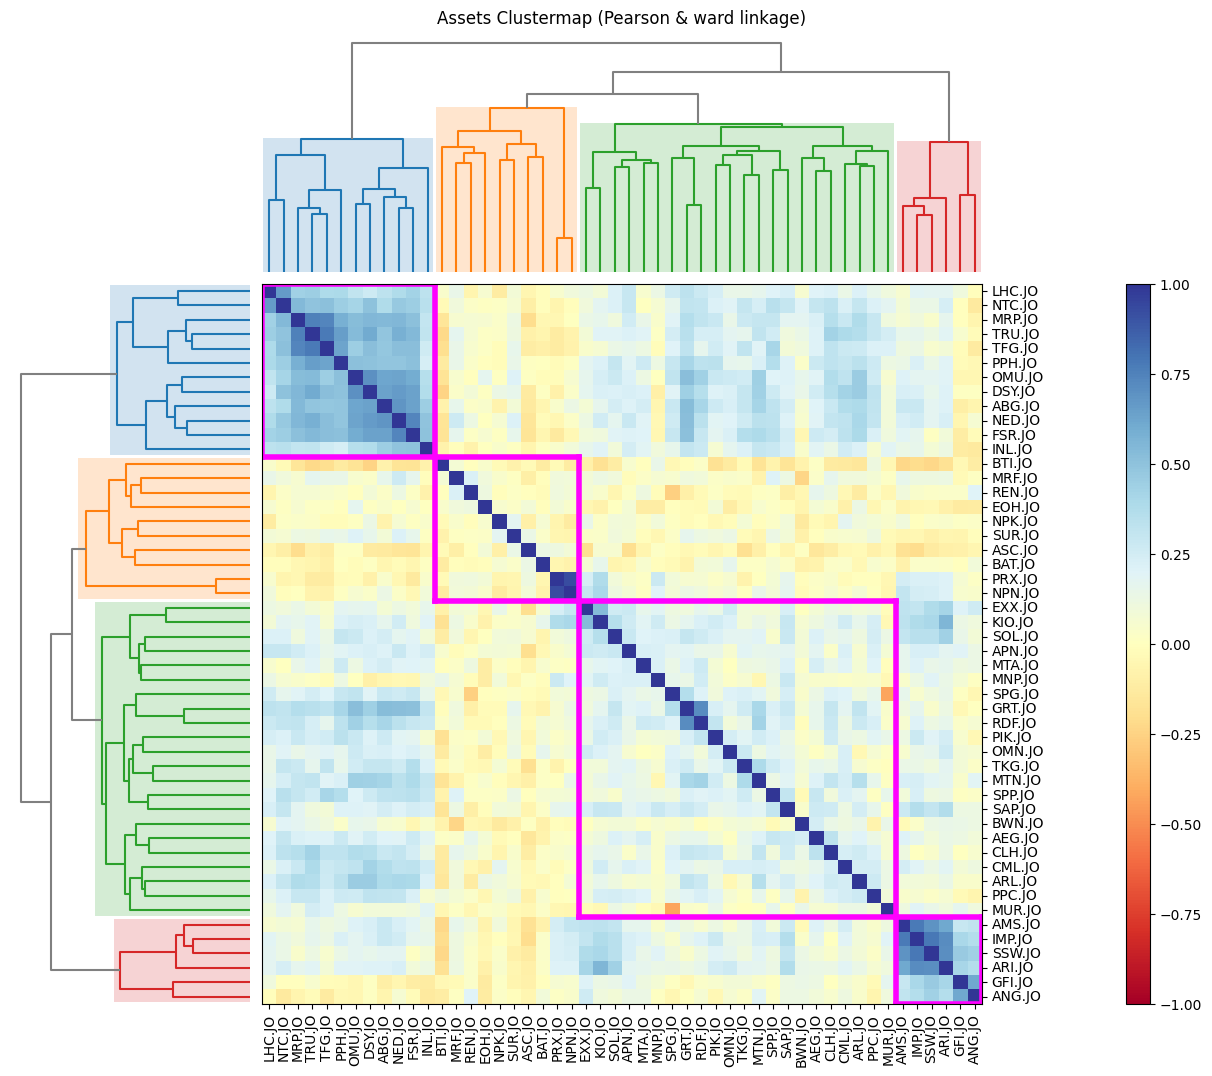

In [27]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns= returns,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

Optimisation - MinRisk as objective function, classic model, MV as a rm.

In [28]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,REN.JO,MTA.JO,ABG.JO,FSR.JO,INL.JO,NED.JO,OMN.JO,SOL.JO,AEG.JO,MUR.JO,...,TRU.JO,PPH.JO,NPN.JO,PRX.JO,EOH.JO,MTN.JO,TKG.JO,BTI.JO,CLH.JO,SUR.JO
weights,0.9144%,0.0000%,0.0000%,1.6208%,9.2657%,0.0000%,3.0750%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.6532%,7.3715%,2.3350%,0.7195%,1.1850%,24.0311%,0.5342%,3.0379%


Composition

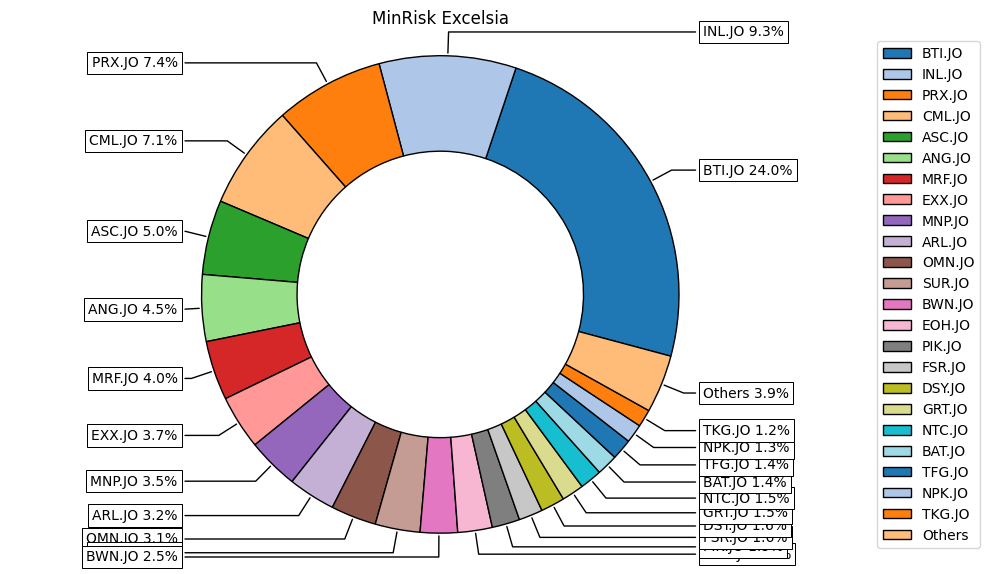

In [29]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='MinRisk Excelsia', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

Plotting the risk composition of the portfolio

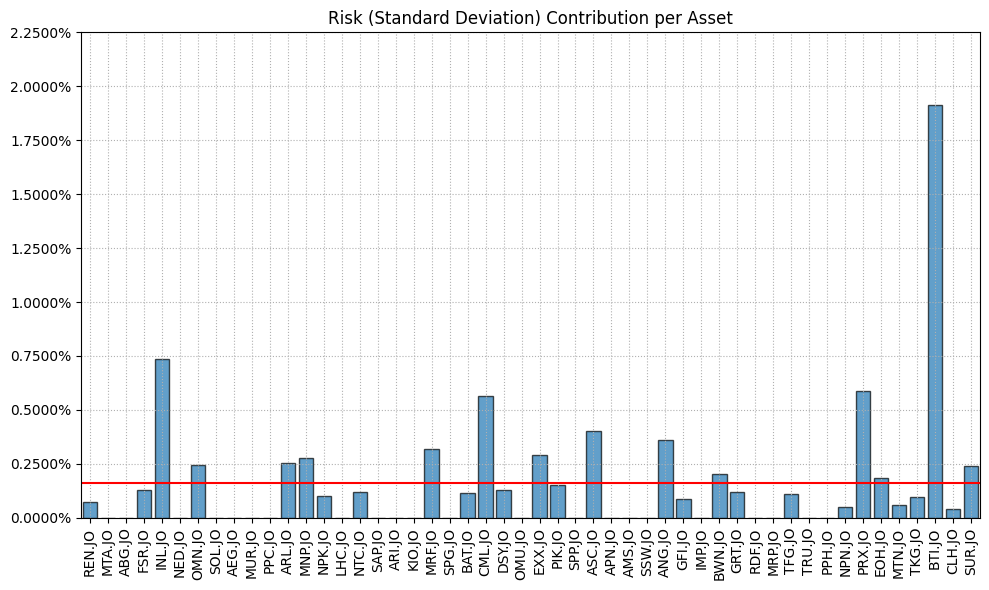

In [30]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

# constrained risk budgeting per company - aim is to improve returns, risk and returns metrics

In [31]:
asset_classes = {'Assets': ["REN.JO", "MTA.JO", "ABG.JO","FSR.JO", "INL.JO","NED.JO","OMN.JO",
           "SOL.JO","AEG.JO","MUR.JO","PPC.JO","ARL.JO","MNP.JO","NPK.JO","LHC.JO",
           "NTC.JO","SAP.JO","ARI.JO","KIO.JO","MRF.JO","SPG.JO","BAT.JO","CML.JO","DSY.JO","OMU.JO",
           "EXX.JO","PIK.JO","SPP.JO","ASC.JO","APN.JO","AMS.JO","SSW.JO","ANG.JO","GFI.JO","IMP.JO",
           "BWN.JO","GRT.JO","RDF.JO","MRP.JO","TFG.JO","TRU.JO","PPH.JO","NPN.JO","PRX.JO","EOH.JO",
           "MTN.JO","TKG.JO","BTI.JO","CLH.JO","SUR.JO"], 
                 'Industry': ['Domestic Equities',"Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                              "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                               "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                                "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                                 "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                                  "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                                   "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                                    "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                                    "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities",
                                    "Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities","Domestic Equities" ]}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])
asset_classes.reset_index(inplace=True, drop=True)

# Risk contribution constraints vector based on Industry Class
b = rp.risk_constraint(asset_classes,
                       kind='classes',
                       classes_col='Industry')

b = pd.DataFrame(b, index=symbols)
print(b)

             0
REN.JO 2.0000%
MTA.JO 2.0000%
ABG.JO 2.0000%
FSR.JO 2.0000%
INL.JO 2.0000%
NED.JO 2.0000%
OMN.JO 2.0000%
SOL.JO 2.0000%
AEG.JO 2.0000%
MUR.JO 2.0000%
PPC.JO 2.0000%
ARL.JO 2.0000%
MNP.JO 2.0000%
NPK.JO 2.0000%
LHC.JO 2.0000%
NTC.JO 2.0000%
SAP.JO 2.0000%
ARI.JO 2.0000%
KIO.JO 2.0000%
MRF.JO 2.0000%
SPG.JO 2.0000%
BAT.JO 2.0000%
CML.JO 2.0000%
DSY.JO 2.0000%
OMU.JO 2.0000%
EXX.JO 2.0000%
PIK.JO 2.0000%
SPP.JO 2.0000%
ASC.JO 2.0000%
APN.JO 2.0000%
AMS.JO 2.0000%
SSW.JO 2.0000%
ANG.JO 2.0000%
GFI.JO 2.0000%
IMP.JO 2.0000%
BWN.JO 2.0000%
GRT.JO 2.0000%
RDF.JO 2.0000%
MRP.JO 2.0000%
TFG.JO 2.0000%
TRU.JO 2.0000%
PPH.JO 2.0000%
NPN.JO 2.0000%
PRX.JO 2.0000%
EOH.JO 2.0000%
MTN.JO 2.0000%
TKG.JO 2.0000%
BTI.JO 2.0000%
CLH.JO 2.0000%
SUR.JO 2.0000%


# Composition - Excelsia 27Four Equity Fund Equally Weighted

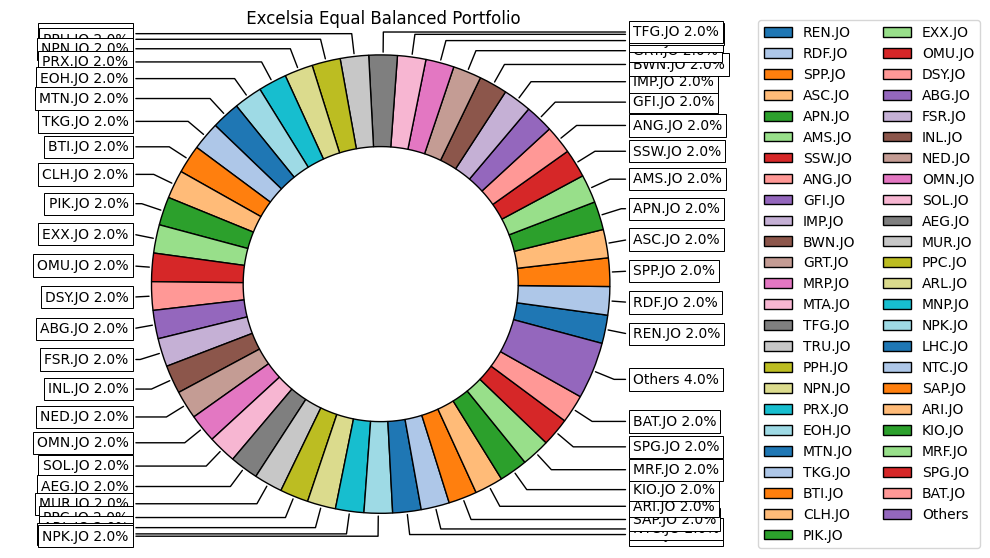

In [32]:
ax = rp.plot_pie(w=b, title=' Excelsia Equal Balanced Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

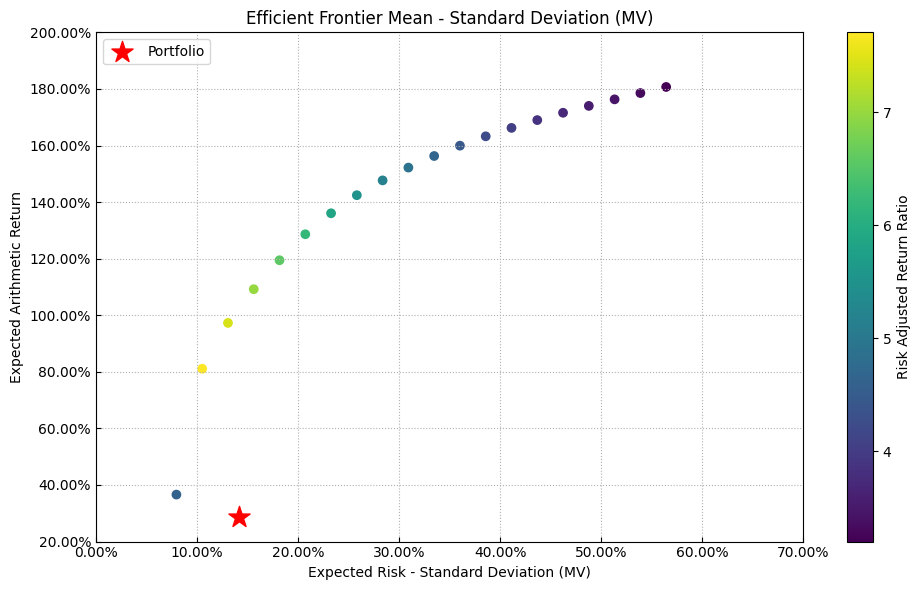

In [33]:
frontier = port.efficient_frontier(model=model, rm=rm, rf=rf, hist=hist)

ax = rp.plot_frontier(w_frontier=frontier, mu=port.mu, cov=port.cov, returns = returns, rm=rm, rf=rf, cmap = "viridis", w=b)
plt.show()

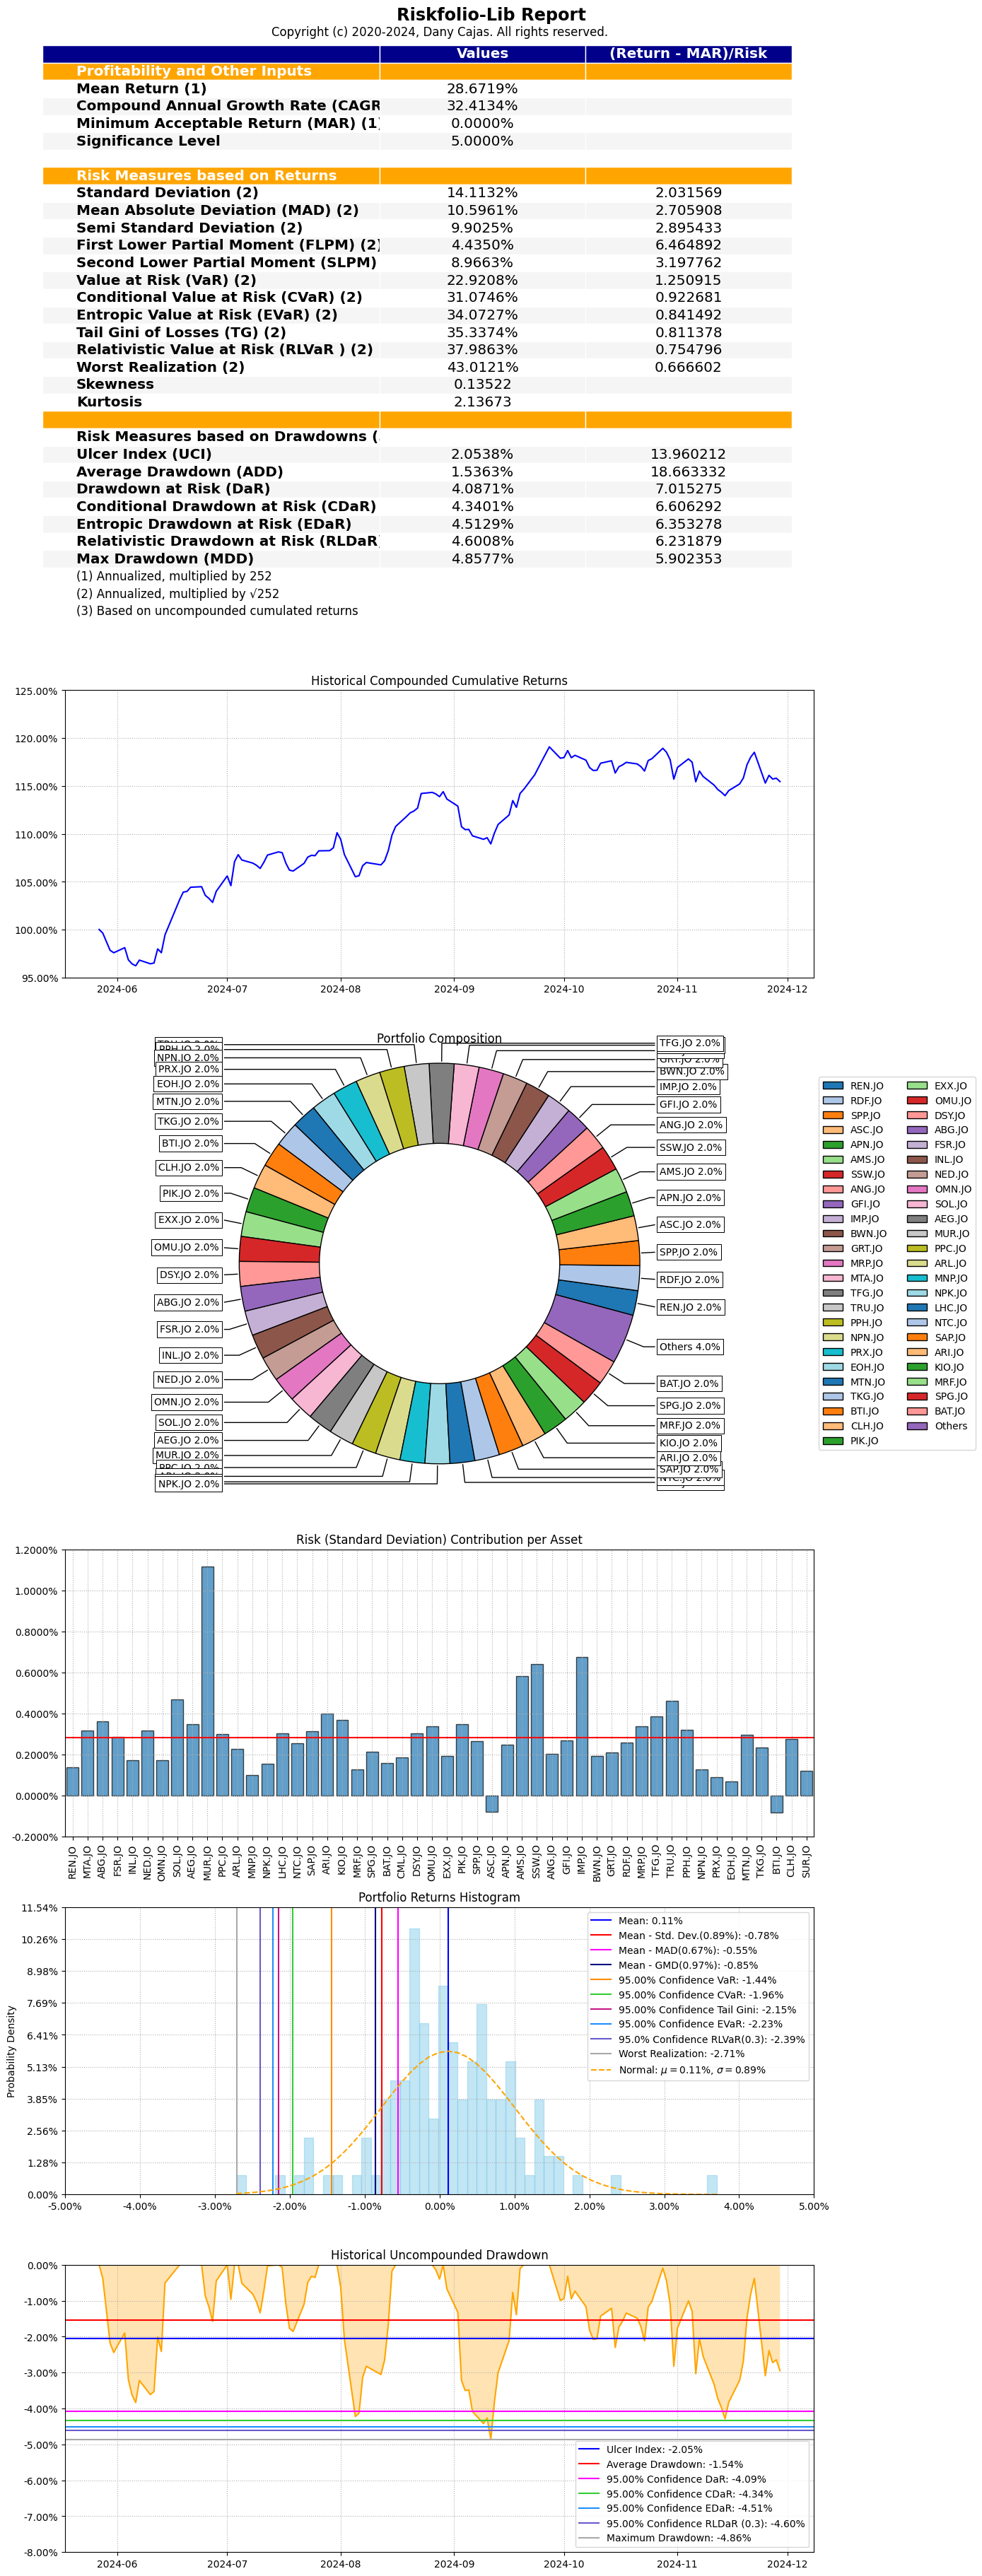

In [34]:
ax = rp.jupyter_report(returns, b, rm=rm, t_factor = 252, days_per_year = 365)
plt.show()

In [13]:
selected_performers = relevant_shares[:55]
selected_performers


['REN.JO',
 'MTA.JO',
 'ABG.JO',
 'FSR.JO',
 'INL.JO',
 'NED.JO',
 'OMN.JO',
 'SOL.JO',
 'MUR.JO',
 'PPC.JO',
 'ARL.JO',
 'MNP.JO',
 'NPK.JO',
 'LHC.JO',
 'NTC.JO',
 'SAP.JO',
 'ARI.JO',
 'KIO.JO',
 'MRF.JO',
 'SPG.JO',
 'BAT.JO',
 'CML.JO',
 'DSY.JO',
 'EXX.JO',
 'PIK.JO',
 'SPP.JO',
 'APN.JO',
 'AMS.JO',
 'ANG.JO',
 'GFI.JO',
 'IMP.JO',
 'GRT.JO',
 'RDF.JO',
 'MRP.JO',
 'TFG.JO',
 'TRU.JO',
 'NPN.JO',
 'EOH.JO',
 'MTN.JO',
 'TKG.JO',
 'BTI.JO',
 'CLH.JO',
 'SUR.JO']

In [14]:
start_date = '2021-01-01'
end_date = '2024-11-30'

# Tickers of assets

# asset_classes = symbols

assets = selected_performers

# Downloading data
data1 = yf.download(assets, start=start_date, end=end_date)["Adj Close"]

[*********************100%***********************]  43 of 43 completed


In [15]:
# Calculating returns

returns_selected_performers = data1[assets].pct_change().dropna()

display(returns_selected_performers.head())

Ticker,REN.JO,MTA.JO,ABG.JO,FSR.JO,INL.JO,NED.JO,OMN.JO,SOL.JO,MUR.JO,PPC.JO,...,MRP.JO,TFG.JO,TRU.JO,NPN.JO,EOH.JO,MTN.JO,TKG.JO,BTI.JO,CLH.JO,SUR.JO
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05 00:00:00+00:00,2.9635%,3.0695%,-2.5192%,-2.8081%,-0.5234%,-3.1105%,-1.1182%,-0.7146%,0.7299%,-2.1898%,...,-1.3841%,-4.2990%,-3.9259%,2.6250%,-1.8540%,2.4705%,-2.8065%,3.2668%,-5.3640%,1.2500%
2021-01-06 00:00:00+00:00,-1.6236%,0.3135%,1.2835%,1.3926%,2.4093%,0.2432%,-2.7273%,8.9546%,1.2077%,-2.9851%,...,-1.8350%,0.3874%,0.3741%,-0.5028%,-4.0142%,4.1514%,3.1862%,1.6415%,0.4049%,-1.2346%
2021-01-07 00:00:00+00:00,-0.2251%,-3.0208%,1.6782%,3.2800%,5.1379%,3.1945%,2.0287%,11.9455%,0.2387%,3.8462%,...,-0.7985%,0.8762%,0.7168%,-2.8136%,3.8130%,5.5189%,3.3451%,0.9856%,4.0323%,8.4375%
2021-01-08 00:00:00+00:00,0.0000%,3.2760%,2.7200%,3.8309%,2.2377%,1.9201%,-0.5809%,4.5590%,0.0000%,7.4074%,...,3.9558%,1.0754%,1.8787%,1.8754%,3.6730%,-1.2785%,2.8945%,-0.4692%,10.4651%,-4.8991%
2021-01-11 00:00:00+00:00,-2.6316%,-1.5081%,-3.3530%,-2.2558%,0.6289%,-3.7678%,0.1124%,-0.8376%,0.0000%,-0.6897%,...,-3.1751%,-1.6675%,-2.7382%,4.3094%,2.0572%,-1.2215%,-3.6298%,0.1204%,-1.7544%,-5.4546%


Optimised using risk constraints - correlation

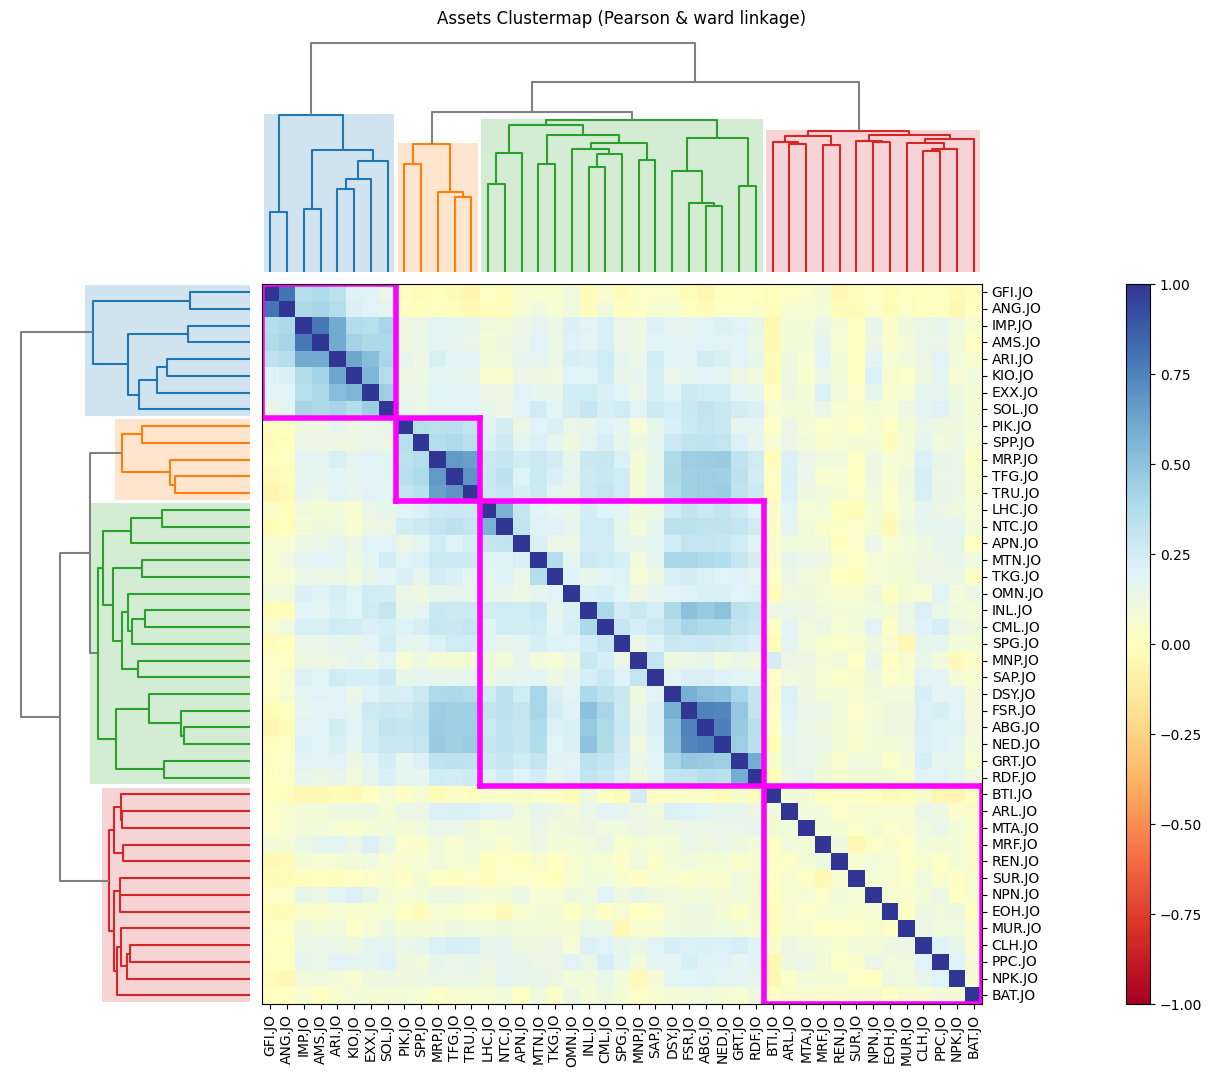

In [16]:
import riskfolio as rp

# Plotting Assets Clusters

ax = rp.plot_clusters(returns= returns_selected_performers,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      #linecolor='tab:purple',
                      ax=None)

# DEFINING A FUNCTION WHICH CALCULATES SHARPE RATIOS FOR AN INDIVIDUAL STOCK AND THEN TAKE THE TOP PERFORMERS

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

def calculate_sharpe_ratio(stock_symbols):
    all_data = pd.DataFrame()

    # Iterate over each stock symbol
    for stock in stock_symbols:
        # Download stock data
        stock_data = yf.download(stock, start='2015-01-01', end='2020-01-01')[['Adj Close']]

        # Add stock data to the DataFrame
        all_data[stock] = stock_data['Adj Close']

    # Drop columns with NaN values
    cleaned_data = all_data.dropna(axis=1)

    # Calculate daily returns
    daily_returns = cleaned_data.pct_change().dropna()

    # Calculate annualized mean returns
    annualized_returns = daily_returns.mean() * 252

    # Calculate annualized standard deviation of returns
    annualized_std_returns = daily_returns.std() * np.sqrt(252)

    # Calculate Sharpe ratio
    sharpe_ratio = annualized_returns / annualized_std_returns

    # Create DataFrame with Sharpe ratios
    sorted_sharpe_ratio = sharpe_ratio.sort_values(ascending=False)


    # Create DataFrame with Sharpe ratios
    sharpe_df = pd.DataFrame({'Sharpe Ratio': sorted_sharpe_ratio})

    return sharpe_df

In [ ]:
sharpe_df = calculate_sharpe_ratio(relevant_shares)
sharpe_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Sharpe Ratio
CPI.JO,1.2181
CLS.JO,1.0065
BVT.JO,0.9503
AMS.JO,0.8279
DRD.JO,0.8086
NPN.JO,0.7089
MNP.JO,0.6631
FFB.JO,0.6109
KIO.JO,0.5869
EXX.JO,0.5328


In [ ]:
#selecting top 30 stocks

performers = sharpe_df[:38]
performers
portfolio_symbols = performers.index.tolist()
portfolio_symbols

['CPI.JO',
 'CLS.JO',
 'BVT.JO',
 'AMS.JO',
 'DRD.JO',
 'NPN.JO',
 'MNP.JO',
 'FFB.JO',
 'KIO.JO',
 'EXX.JO',
 'GFI.JO',
 'ARI.JO',
 'IMP.JO',
 'FSR.JO',
 'SPP.JO',
 'SBK.JO',
 'AVI.JO',
 'ADH.JO',
 'BAW.JO',
 'TFG.JO',
 'INL.JO',
 'RES.JO',
 'DSY.JO',
 'GRT.JO',
 'VOD.JO',
 'ABG.JO',
 'SAP.JO',
 'NED.JO',
 'BTI.JO',
 'RDF.JO',
 'GLN.JO',
 'MRP.JO',
 'OUT.JO',
 'MTM.JO',
 'TRU.JO',
 'SOL.JO',
 'REM.JO',
 'SHP.JO']

In [ ]:
# Empty dataframe to store stock symbols and sectors
stock_sector_df = pd.DataFrame(columns=['Symbol', 'Sector'])

# Fetch sector information for each stock
for symbol in portfolio_symbols:
    symbol_with_extension = f"{symbol}"  # Append .NS extension
    stock = yf.Ticker(symbol_with_extension)
    info = stock.info
    sector = info.get('sector', 'Unknown')
    stock_sector_df.loc[len(stock_sector_df)] = {'Symbol': symbol, 'Sector': sector}
# Set serial number as an index
stock_sector_df.index = pd.Index(range(1, len(stock_sector_df) + 1))

print(stock_sector_df)


    Symbol                  Sector
1   CPI.JO      Financial Services
2   CLS.JO              Healthcare
3   BVT.JO             Industrials
4   AMS.JO         Basic Materials
5   DRD.JO         Basic Materials
6   NPN.JO  Communication Services
7   MNP.JO         Basic Materials
8   FFB.JO             Real Estate
9   KIO.JO         Basic Materials
10  EXX.JO                  Energy
11  GFI.JO         Basic Materials
12  ARI.JO         Basic Materials
13  IMP.JO         Basic Materials
14  FSR.JO      Financial Services
15  SPP.JO      Consumer Defensive
16  SBK.JO      Financial Services
17  AVI.JO      Consumer Defensive
18  ADH.JO      Consumer Defensive
19  BAW.JO             Industrials
20  TFG.JO       Consumer Cyclical
21  INL.JO      Financial Services
22  RES.JO             Real Estate
23  DSY.JO      Financial Services
24  GRT.JO             Real Estate
25  VOD.JO  Communication Services
26  ABG.JO      Financial Services
27  SAP.JO         Basic Materials
28  NED.JO      Fina

In [ ]:
#lets groupby the stock_sector_df by sector
stock_sector_df.groupby('Sector').size()

Sector
Basic Materials           10
Communication Services     2
Consumer Cyclical          4
Consumer Defensive         4
Energy                     1
Financial Services        10
Healthcare                 1
Industrials                2
Real Estate                4
dtype: int64

In [ ]:
#selecting only first values of a unique sector
stock_sector_df = stock_sector_df.groupby('Sector').first()
stock_sector_df

""
Sector
Basic Materials
Communication Services
Consumer Cyclical
Consumer Defensive
Energy
Financial Services
Healthcare
Industrials
Real Estate


In [ ]:
#we will construct a portfolio from these stocks
port_opt_sym = stock_sector_df['Symbol'].tolist()
print(port_opt_sym)

['AMS.JO', 'NPN.JO', 'TFG.JO', 'SPP.JO', 'EXX.JO', 'CPI.JO', 'CLS.JO', 'BVT.JO', 'FFB.JO']


In [ ]:
#download adj close data for the stocks from yfinance and add .NS as an extension

df_ = pd.DataFrame()

for stock in port_opt_sym:
    df_ = pd.concat([df_, yf.download(stock, start='2015-01-01', end='2020-01-01')[['Adj Close']]], axis=1)

df_.columns = port_opt_sym

portfolio_ = pd.DataFrame(columns=['returns','volatility'])
#returns calculaions
daily_returns = df_.pct_change().dropna()
annualized_returns = daily_returns.mean() * 252
annualized_std_returns = daily_returns.std() * np.sqrt(252)
portfolio_['returns'] = annualized_returns
portfolio_['volatility'] = annualized_std_returns
portfolio_.index = port_opt_sym
portfolio_

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,returns,volatility
AMS.JO,0.3753,0.4533
NPN.JO,0.2290,0.3231
TFG.JO,0.1302,0.3493
SPP.JO,0.1085,0.2531
EXX.JO,0.2391,0.4487
CPI.JO,0.3420,0.2807
CLS.JO,0.2914,0.2895
BVT.JO,0.2712,0.2854
FFB.JO,0.1265,0.2071
